In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [2]:
import pandas as pd
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Separate x and y

In [5]:
x=df.drop(columns=['Drug'])
y=df[['Drug']]

In [6]:
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [7]:
y.head()

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY


cat con separation

In [8]:
cat=list(x.columns[x.dtypes=='object'])
con=list(x.columns[x.dtypes!='object'])

In [9]:
cat

['Sex', 'BP', 'Cholesterol']

In [10]:
con

['Age', 'Na_to_K']

preprocessing pipeline

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [12]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),('scaler', StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('ohe',OneHotEncoder(handle_unknown='ignore'))])

In [13]:
pre=ColumnTransformer([('num',num_pipe,con),('cat',cat_pipe,cat)])

In [14]:
x_pre=pre.fit_transform(x)

In [15]:
x_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [16]:
cols=pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [17]:
x_pre=pd.DataFrame(x_pre, columns=cols)
x_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


train test split

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_pre,y,test_size=0.33,random_state=21)

In [20]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
7,-0.200874,-0.700468,0.0,1.0,0.0,1.0,0.0,1.0,0.0
95,-0.503851,-0.646762,0.0,1.0,0.0,1.0,0.0,0.0,1.0
156,-0.806828,-0.674101,0.0,1.0,1.0,0.0,0.0,0.0,1.0
175,1.738179,0.314121,1.0,0.0,1.0,0.0,0.0,1.0,0.0
140,0.283889,-1.362151,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [21]:
ytrain.head()

,Drug
7,drugC
95,drugX
156,drugA
175,drugY
140,drugA


In [23]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
144,-0.322065,-0.891007,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9,-0.079683,0.455672,0.0,1.0,0.0,1.0,0.0,0.0,1.0
17,-0.079683,-0.293162,0.0,1.0,1.0,0.0,0.0,1.0,0.0
20,0.768653,0.422366,0.0,1.0,0.0,1.0,0.0,0.0,1.0
45,1.314011,-1.107081,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [24]:
ytest.head()

,Drug
144,drugA
9,drugY
17,drugA
20,drugY
45,drugX


create decision tree model

In [25]:
from sklearn.tree  import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=3,min_samples_leaf=5,min_samples_split=3, criterion='entropy')

In [26]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=3)

In [27]:
model.score(xtrain,ytrain)

0.9104477611940298

In [28]:
model.score(xtest,ytest)

0.8484848484848485

create a hyperparameteric tunning

In [29]:
params={'max_depth':[1,2,3,4,5,6,7,8],
        'min_samples_split':[1,2,3,4,5,6,7,8],
        'min_samples_leaf':[1,2,3,4,5,6,7,8],
        'criterion':['gini','entropy']}

In [30]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
gscv=GridSearchCV(dtc,param_grid=params,cv=5,scoring='f1_macro')

In [31]:
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8]},
             scoring='f1_macro')

In [32]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [33]:
gscv.best_score_

0.9958518518518519

In [34]:
best_dtc=gscv.best_estimator_

In [35]:
best_dtc

DecisionTreeClassifier(max_depth=4)

evatulate the model

In [36]:
best_dtc.score(xtrain,ytrain)

1.0

In [37]:
best_dtc.score(xtest,ytest)

0.9696969696969697

create a confusion matrix

In [38]:
ypred_tr=best_dtc.predict(xtrain)
ypred_ts=best_dtc.predict(xtest)

In [39]:
ypred_tr[0:5]

array(['drugC', 'drugX', 'drugA', 'drugY', 'drugA'], dtype=object)

In [40]:
ytrain.head()

,Drug
7,drugC
95,drugX
156,drugA
175,drugY
140,drugA


In [41]:
ypred_ts[0:5]

array(['drugA', 'drugY', 'drugA', 'drugY', 'drugX'], dtype=object)

In [42]:
ytest.head()

,Drug
144,drugA
9,drugY
17,drugA
20,drugY
45,drugX


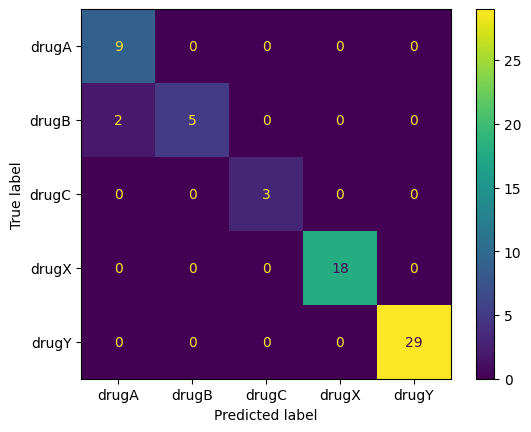

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf=confusion_matrix(ytest,ypred_ts)
cfd=ConfusionMatrixDisplay(cf,display_labels=best_dtc.classes_)
cfd.plot()

print classification report 

In [44]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

       drugA       0.82      1.00      0.90         9
       drugB       1.00      0.71      0.83         7
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        29

    accuracy                           0.97        66
   macro avg       0.96      0.94      0.95        66
weighted avg       0.98      0.97      0.97        66



plot decision tree

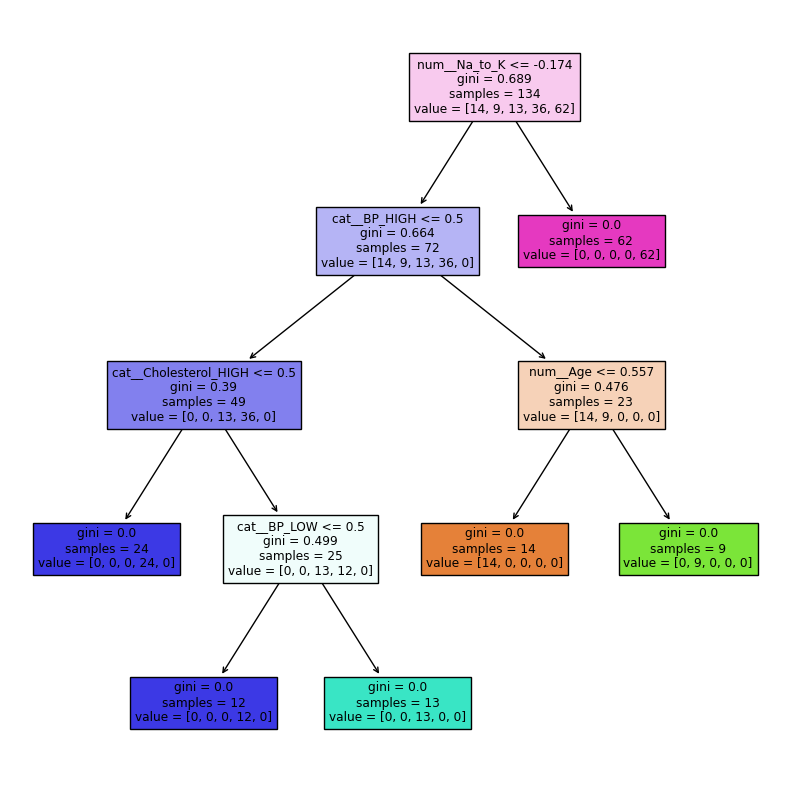

In [45]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(best_dtc,feature_names=list(xtrain.columns),filled=True)
plt.show() 